# CS/CE 457/464 Homework 11

## Owais Aijaz 7610
## oa07610@st.habib.edu.pk

# Question 01

In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import urllib.request

### Original Image:

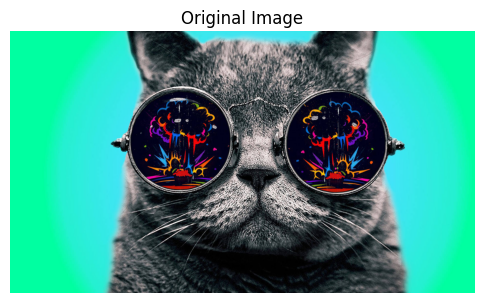

In [3]:
img = 'https://wallpapers.com/images/hd/cool-cat-explosion-glasses-fg3358ff9isvigv8.jpg'

resp = urllib.request.urlopen(img)
image_array = np.asarray(bytearray(resp.read()), dtype="uint8")
original_image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

#Convert to RGB for display
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

#Display the original image
plt.figure(figsize=(6,6))
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

I am using a cool cat image off the internet :)

### Guassian Blur Filter:

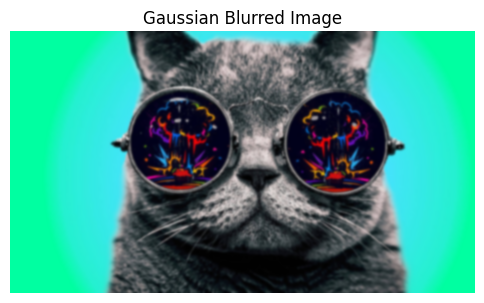

In [12]:
#Applying Gaussian Blur
gaussian_blur = cv2.GaussianBlur(original_image_rgb, (25, 25), 0)

#Display the Gaussian Blurred image
plt.figure(figsize=(6,6))
plt.imshow(gaussian_blur)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

Gaussian Blur is a low-pass filter that smooths the image by reducing noise and detail. It works by averaging the pixels with their neighbors, weighted by a Gaussian function. It helps in removing noise and reducing detail. The image appears smoother with reduced sharpness. This is useful for tasks where minor variations are irrelevant or could interfere with analysis. As you can notice, the resulting image is indeed blurred and smoother as intended.


### Canny Edge Detection:

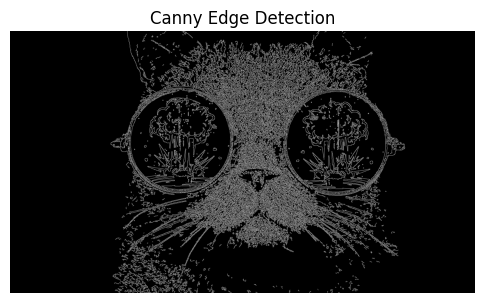

In [5]:
#Converting to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

#Applying Canny Edge Detection
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

#Display the Edge Detection result
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

The Canny Edge Detector is a multi-stage algorithm to detect a wide range of edges in images. It uses gradients to find intensity changes that signify edges. It identifies significant transitions in intensity, useful for object detection and image segmentation. Extracts important structural features from images. As you can clearly see, the resulting image is a binary image highlighting the edges where significant intensity changes occur.

### Sobel Kernel:

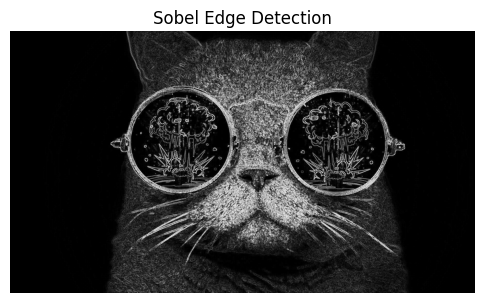

In [7]:
#Apply Sobel filter in the x direction
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)

#Apply Sobel filter in the y direction
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_y = cv2.convertScaleAbs(sobel_y)

#Combine the two gradients
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

#Display the Sobel Edge Detection result
plt.figure(figsize=(6,6))
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

The Sobel operator is a discrete differentiation operator that computes an approximation of the gradient of the image intensity function. It is used to find the edges of objects within images by calculating the gradient in the horizontal and vertical directions. It provides information about the direction and magnitude of edges, which is useful for object recognition and image analysis. The image highlights edges by calculating the gradient in both horizontal and vertical directions, resulting in a clear depiction of object boundaries.

# Question 02

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import os

# Checking for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


## Dataset:

I am using cats vs dogs, very famous dataset from kaggle: ttps://www.kaggle.com/datasets/aleemaparakatta/cats-and-dogs-mini-dataset. I have 700 total train images (350 each) and 300 total test images (150 each). Also, I have 6 total new images which I'm classifying as well. This distribution of data ensures that the model has sufficient amount of data to perform feature extraction.

In [24]:
# Define dataset paths
base_dir = '/content/Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
new_images_dir = os.path.join(base_dir, 'new_images')

# Define transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

I utilized ResNet18, a widely recognized deep convolutional neural network pre-trained on ImageNet. I had used it for classification in my Computer Vision course and hence using the same code. This choice was driven by its proven ability to generalize well across various image classification tasks, even with relatively small datasets, due to transfer learning. By leveraging its pre-trained feature extraction capabilities, we could effectively identify complex patterns and by modifying the final layer of ResNet18 allowed us to adapt it to a binary classification problem, ensuring a balance between computational efficiency and accuracy.

In [25]:
model = models.resnet18(pretrained=True)
# Modify the final layer to match the binary classification task
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 1),
    nn.Sigmoid()
)

model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 104MB/s]


In [26]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [27]:
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = (outputs > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation Phase
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            preds = (outputs > 0.5).float()
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(test_loader.dataset)
    val_acc = val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    scheduler.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")

Epoch [1/10], Train Loss: 0.3211, Train Acc: 84.57%, Val Loss: 10.2101, Val Acc: 58.50%
Epoch [2/10], Train Loss: 0.1635, Train Acc: 92.71%, Val Loss: 0.4564, Val Acc: 83.33%
Epoch [3/10], Train Loss: 0.1439, Train Acc: 95.29%, Val Loss: 0.6446, Val Acc: 79.93%
Epoch [4/10], Train Loss: 0.1292, Train Acc: 94.71%, Val Loss: 0.8606, Val Acc: 86.39%
Epoch [5/10], Train Loss: 0.1197, Train Acc: 96.71%, Val Loss: 0.9049, Val Acc: 78.57%
Epoch [6/10], Train Loss: 0.0963, Train Acc: 95.57%, Val Loss: 0.5690, Val Acc: 78.91%
Epoch [7/10], Train Loss: 0.0525, Train Acc: 98.00%, Val Loss: 0.9693, Val Acc: 77.55%
Epoch [8/10], Train Loss: 0.0256, Train Acc: 99.14%, Val Loss: 0.4544, Val Acc: 84.69%
Epoch [9/10], Train Loss: 0.0362, Train Acc: 99.14%, Val Loss: 0.5105, Val Acc: 84.01%
Epoch [10/10], Train Loss: 0.0592, Train Acc: 97.86%, Val Loss: 0.5830, Val Acc: 83.33%


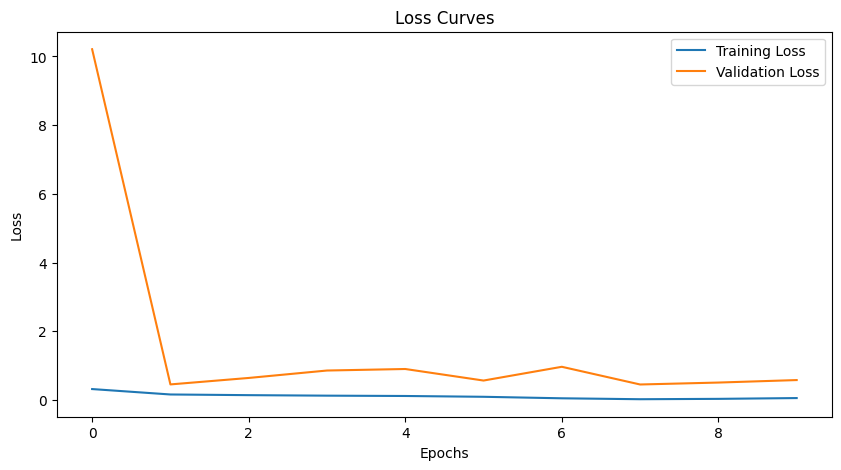

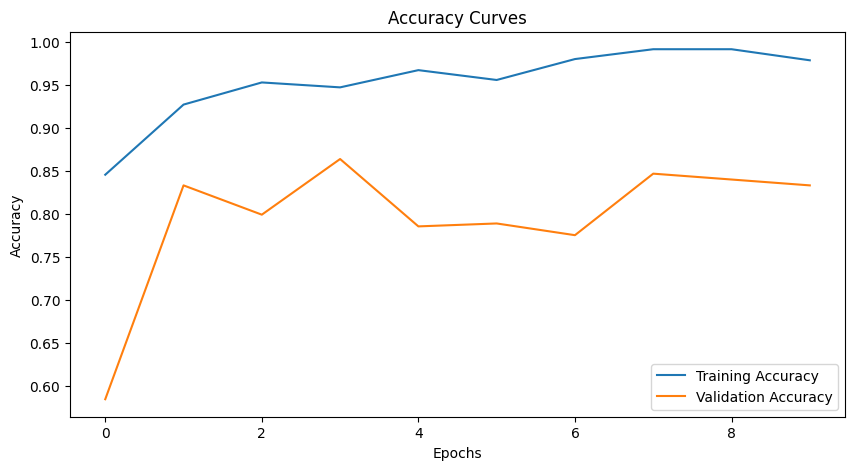

In [28]:
# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.title("Accuracy Curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**1. Loss Curves (First Graph):**

The training loss starts low and gradually decreases further while yhe validation loss starts high but drops significantly in the first few epochs, suggesting rapid improvement in the model's generalization. However, after an initial drop, the validation loss fluctuates slightly which suggests that the model benefits from transfer learning and quickly adapts to the binary classification task of cats vs. dogs.
The slight increase and fluctuation in validation loss could indicate that while the model is learning, it might be starting to memorize some training data rather than generalizing completely.

**2. Accuracy Curves (Second Graph):**

The training accuracy improves consistently over the epochs and reaches close to 98%, indicating that the model performs exceptionally well on the training data. The validation accuracy starts at around 60% and improves steadily, reaching a peak of about 85%. However, it fluctuates slightly in later epochs. The consistent improvement in training accuracy shows the model's ability to learn and classify the training images effectively.

In [29]:
def evaluate_on_new_images(model, new_images_dir, transform):
    # Load new images dataset
    new_dataset = datasets.ImageFolder(new_images_dir, transform=transform)
    new_loader = DataLoader(new_dataset, batch_size=1, shuffle=False)

    class_names = new_dataset.classes
    model.eval()

    with torch.no_grad():
        for images, labels in new_loader:
            images = images.to(device)
            outputs = model(images)
            pred = (outputs > 0.5).float()
            predicted_class = class_names[int(pred.item())]
            actual_class = class_names[labels.item()]

            # Move image back to CPU and unnormalize for display
            img = images.cpu().squeeze(0).permute(1, 2, 0).numpy()  # Convert tensor to numpy array
            img = img * 0.5 + 0.5  # Undo normalization (mean=0.5, std=0.5)

            # Plot image with prediction and actual label
            plt.imshow(img)
            plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
            plt.axis('off')
            plt.show()

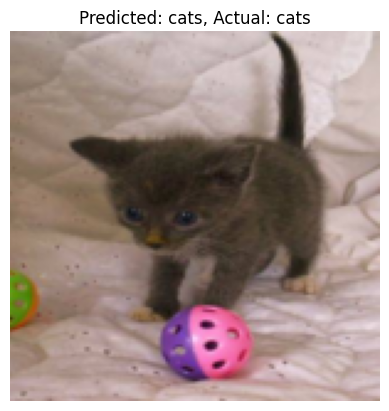

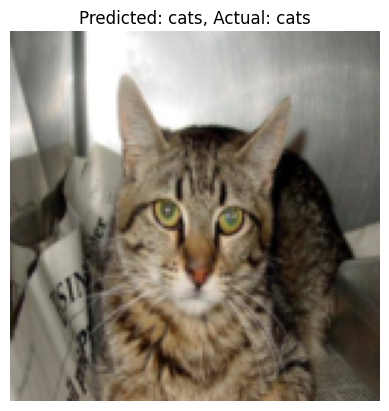

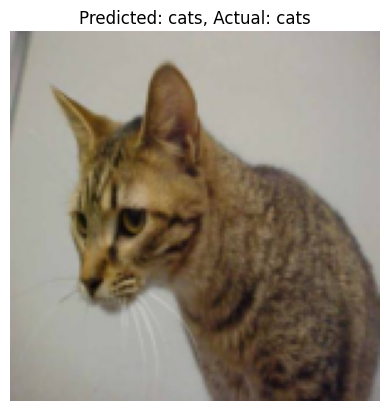

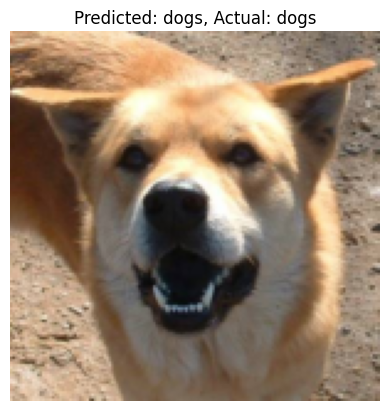

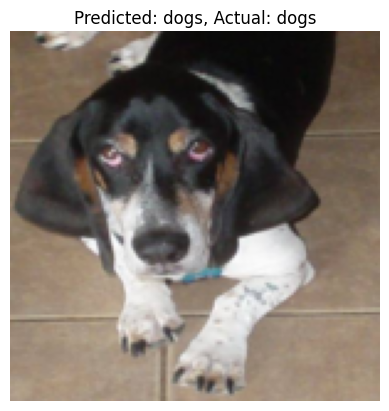

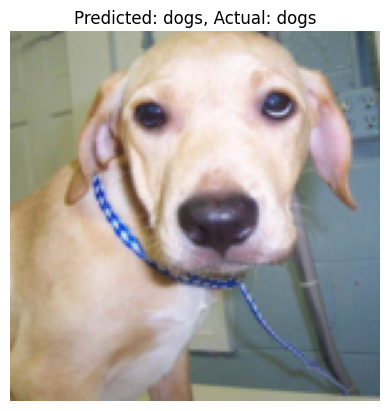

In [30]:
evaluate_on_new_images(model, new_images_dir, transform)

As we can see, the model accurately classifies all 6 images and maps dogs to dogs and cats to cats. This shows that the model performs fairly well. Thing to note here is that, I intentionally picked easier images. That is, the images in which cats and dogs face is pretty clear and it's fairly easy to identify them. Howvever the model might struggle if the images are a bit more complex or have some obstruction/cutout in them.